<a href="https://colab.research.google.com/github/Pettyman123/Machine-learning-projects/blob/master/Car_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car price prediction model

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics

Data collecting


In [ ]:
#loading data from csv files to pandas dataframe
car_dataset = pd.read_csv('/car data.csv')

In [ ]:
#inspecting dataset
car_dataset.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [ ]:
#inspecting first 5 rows of dataframe 
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#checking the number of rows and colums 
car_dataset.shape


(301, 9)

In [ ]:
# gettig info about dataset
car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [ ]:
#checking if there is some misisign data
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking the distrubituion of categorial data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding


In [ ]:
#Encoding 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace= True)
#Ecnoding 'Seller_type' column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace= True)
#Encoding 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace= True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting and test data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2) 

Model Training
1. Linear regression

In [ ]:
#loading the linear regression model 
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model evaluation


In [ ]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# R squread error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8799451660493711


Visualize the actual prices and predictes prices


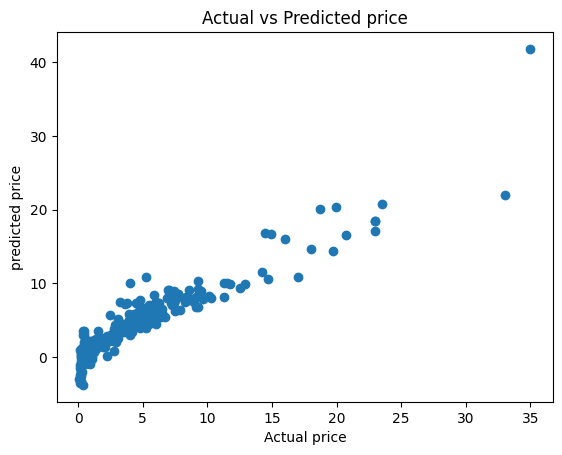

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted price")
plt.show()

In [ ]:
#preditciion on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#R sqr error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R sqr error:", error_score)

R sqr error: 0.8365766715027051


Visualize the test data 

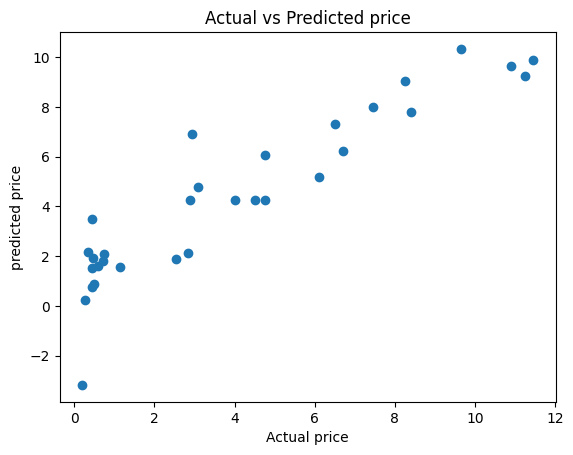

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted price")
plt.show()

2. Lasso regression


In [ ]:
#loading the linear regression model 
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)
# R squread error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8427856123435794


visuliaxe training data


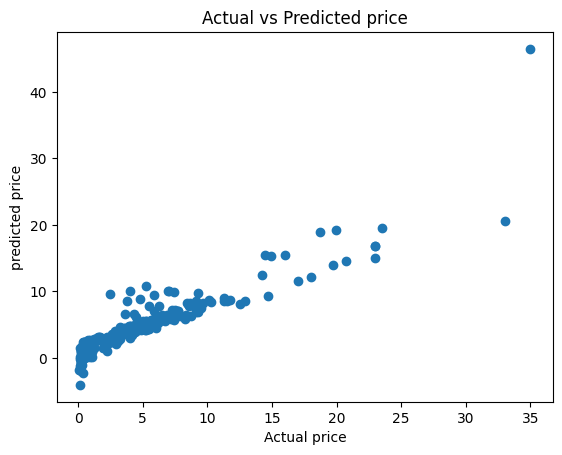

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted price")
plt.show()

Visualice test data


In [ ]:
#preditciion on training data
test_data_prediction = lass_reg_model.predict(X_test)
#R sqr error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R sqr error:", error_score)

R sqr error: 0.8709167941173195


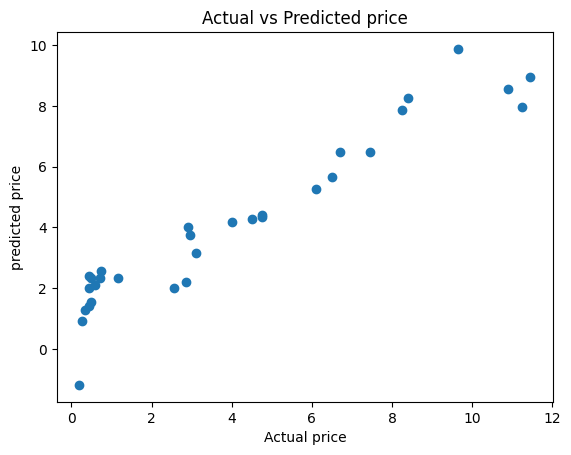

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted price")
plt.show()

#The end
